In [70]:
from sklearn.datasets import load_breast_cancer
import pandas as pd  # Import Pandas for data manipulation using dataframes
import numpy as np  # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt  # Import matplotlib for data visualisation
import seaborn as sns  # Statistical data visualization
import torch
import numpy as np
import pandas as pd
from torch.autograd import Variable
import torch.nn.functional as F
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
import os

data = pd.read_csv("BreastCancerDetection.csv")

cols = data.columns
x_data = data[cols[2:-1]]
print(len(cols))
x_data.head()

33


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [71]:
cols

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [72]:
x_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [73]:
y_data = data[cols[1]] #diagnosis
le = LabelEncoder()
y_data = np.array(le.fit_transform(y_data))
y_data[:5], le.classes_ 

(array([1, 1, 1, 1, 1]), array(['B', 'M'], dtype=object))

In [78]:
y_data.shape, x_data.values.shape

In [79]:
x_data = Variable(torch.from_numpy(x_data.values))
y_data = Variable(torch.from_numpy(y_data))

In [80]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = torch.nn.Linear(30,16)
        self.l2 = torch.nn.Linear(16,4)
        self.l3 = torch.nn.Linear(4,1)
        
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        out1 = self.sigmoid(self.l1(x)) 
        out2 = self.sigmoid(self.l2(out1))
        y_pred = self.sigmoid(self.l3(out2))
        return y_pred
    
model = Model()
y_pred = model(x_data.float())

y_pred

tensor([[0.4059],
        [0.4071],
        [0.4071],
        [0.4071],
        [0.4079],
        [0.4071],
        [0.4071],
        [0.4071],
        [0.4071],
        [0.4071],
        [0.4071],
        [0.4071],
        [0.4071],
        [0.4082],
        [0.4080],
        [0.4071],
        [0.4071],
        [0.4071],
        [0.4064],
        [0.4075],
        [0.4080],
        [0.4075],
        [0.4071],
        [0.4071],
        [0.4059],
        [0.4071],
        [0.4071],
        [0.4071],
        [0.4071],
        [0.4071],
        [0.4071],
        [0.4059],
        [0.4071],
        [0.4071],
        [0.4071],
        [0.4071],
        [0.4075],
        [0.4090],
        [0.4133],
        [0.4072],
        [0.4071],
        [0.4071],
        [0.4071],
        [0.4071],
        [0.4071],
        [0.4071],
        [0.4074],
        [0.4071],
        [0.4071],
        [0.4078],
        [0.4074],
        [0.4082],
        [0.4079],
        [0.4071],
        [0.4071],
        [0

In [81]:
x_data.float().size(), y_data.float().size() 

(torch.Size([569, 30]), torch.Size([569]))

In [82]:
criterion = torch.nn.BCELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epochs in range(500):
    y_pred = model(x_data.float())
    loss = criterion(y_pred, y_data.view(-1,1).float())
    print('Epoch',epochs,'Loss:',loss.item(), '- Pred:', y_pred.data[0])
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
#The error function is the function representing the difference between the values 
#computed by your model and the real values. In the optimization field often they
#speak about two phases: a training phase in which the model is set,
#and a test phase in which the model tests its behaviour against the real values of output.
#In the training phase the error is necessary to improve the model, 
#while in the test phase the error is useful to check if the model works properly.

#The objective function is the function you want to maximize or minimize. 
#When they call it "cost function" (again, it's the objective function)
#it's because they want to only minimize it. 
#I see the cost function and the objective function as the same thing seen from slightly 
#different perspectives.

#The "criterion" is usually the rule for stopping the algorithm you're using.
#Suppose you want that your model find the minimum of an objective function,
#in real experiences it is often hard to find the exact minimum and the algorithm 
#could continuing to work for a very long time. In that case you could accept to 
#stop it "near" to the optimum with a particular stopping criterion.

Epoch 0 Loss: 377.4519348144531 - Pred: tensor([0.4059])
Epoch 1 Loss: 377.2734069824219 - Pred: tensor([0.4050])
Epoch 2 Loss: 377.10272216796875 - Pred: tensor([0.4041])
Epoch 3 Loss: 376.9659118652344 - Pred: tensor([0.4033])
Epoch 4 Loss: 376.8608093261719 - Pred: tensor([0.4024])
Epoch 5 Loss: 376.7729187011719 - Pred: tensor([0.4015])
Epoch 6 Loss: 376.6984558105469 - Pred: tensor([0.4007])
Epoch 7 Loss: 376.630859375 - Pred: tensor([0.3999])
Epoch 8 Loss: 376.5677490234375 - Pred: tensor([0.3994])
Epoch 9 Loss: 376.5089416503906 - Pred: tensor([0.3986])
Epoch 10 Loss: 376.45367431640625 - Pred: tensor([0.3977])
Epoch 11 Loss: 376.4006652832031 - Pred: tensor([0.3968])
Epoch 12 Loss: 376.3505554199219 - Pred: tensor([0.3960])
Epoch 13 Loss: 376.30303955078125 - Pred: tensor([0.3951])
Epoch 14 Loss: 376.25689697265625 - Pred: tensor([0.3942])
Epoch 15 Loss: 376.212890625 - Pred: tensor([0.3934])
Epoch 16 Loss: 376.1711730957031 - Pred: tensor([0.3925])
Epoch 17 Loss: 376.131317138

Epoch 173 Loss: 350.0721740722656 - Pred: tensor([0.4267])
Epoch 174 Loss: 349.7661437988281 - Pred: tensor([0.4273])
Epoch 175 Loss: 349.4598083496094 - Pred: tensor([0.4278])
Epoch 176 Loss: 349.1520690917969 - Pred: tensor([0.4283])
Epoch 177 Loss: 348.8440856933594 - Pred: tensor([0.4289])
Epoch 178 Loss: 348.5359802246094 - Pred: tensor([0.4294])
Epoch 179 Loss: 348.2272033691406 - Pred: tensor([0.4299])
Epoch 180 Loss: 347.9172058105469 - Pred: tensor([0.4305])
Epoch 181 Loss: 347.6064453125 - Pred: tensor([0.4310])
Epoch 182 Loss: 347.2953186035156 - Pred: tensor([0.4315])
Epoch 183 Loss: 346.9833068847656 - Pred: tensor([0.4321])
Epoch 184 Loss: 346.6705322265625 - Pred: tensor([0.4326])
Epoch 185 Loss: 346.3565979003906 - Pred: tensor([0.4331])
Epoch 186 Loss: 346.0420837402344 - Pred: tensor([0.4337])
Epoch 187 Loss: 345.7264709472656 - Pred: tensor([0.4342])
Epoch 188 Loss: 345.40972900390625 - Pred: tensor([0.4348])
Epoch 189 Loss: 345.0914001464844 - Pred: tensor([0.4353])

Epoch 347 Loss: 286.3771667480469 - Pred: tensor([0.5339])
Epoch 348 Loss: 285.8356628417969 - Pred: tensor([0.5348])
Epoch 349 Loss: 285.4412841796875 - Pred: tensor([0.5358])
Epoch 350 Loss: 284.9178771972656 - Pred: tensor([0.5368])
Epoch 351 Loss: 284.3111267089844 - Pred: tensor([0.5377])
Epoch 352 Loss: 283.80487060546875 - Pred: tensor([0.5387])
Epoch 353 Loss: 283.3535461425781 - Pred: tensor([0.5397])
Epoch 354 Loss: 282.85040283203125 - Pred: tensor([0.5407])
Epoch 355 Loss: 282.2647399902344 - Pred: tensor([0.5416])
Epoch 356 Loss: 281.779541015625 - Pred: tensor([0.5425])
Epoch 357 Loss: 281.31072998046875 - Pred: tensor([0.5435])
Epoch 358 Loss: 280.7940368652344 - Pred: tensor([0.5444])
Epoch 359 Loss: 280.2484130859375 - Pred: tensor([0.5454])
Epoch 360 Loss: 279.7467041015625 - Pred: tensor([0.5464])
Epoch 361 Loss: 279.2632751464844 - Pred: tensor([0.5473])
Epoch 362 Loss: 278.7408752441406 - Pred: tensor([0.5483])
Epoch 363 Loss: 278.1864013671875 - Pred: tensor([0.54

In [83]:
x_data.data[0]>0.5

tensor([ True,  True,  True,  True, False, False, False, False, False, False,
         True,  True,  True,  True, False, False, False, False, False, False,
         True,  True,  True,  True, False,  True,  True, False, False, False])

In [84]:
model.double().forward(x_data.data[25]) > 0.5, y_data[25]

(tensor([True]), tensor(1))

In [85]:
model.double().forward(x_data.data[25])

tensor([0.6630], dtype=torch.float64, grad_fn=<SigmoidBackward>)

In [86]:
x_data.data[25]>0.5

tensor([ True,  True,  True,  True, False, False, False, False, False, False,
         True,  True,  True,  True, False, False, False, False, False, False,
         True,  True,  True,  True, False, False, False, False, False, False])

In [87]:
model.double().forward(x_data.data[55]) > 0.5, y_data[55]

(tensor([False]), tensor(0))

In [88]:
pred = model.double().forward(x_data) > 0.5
pred.numpy()[:5]

array([[ True],
       [ True],
       [ True],
       [False],
       [ True]])

In [89]:
a = pred.numpy()
b = y_data.numpy()
pred.numpy().reshape(-1).shape, y_data.numpy().shape

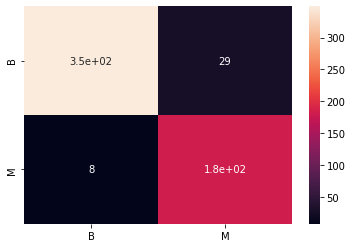

In [90]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
c = confusion_matrix(a,b)
sns.heatmap(c, annot=True, xticklabels=le.classes_, yticklabels=le.classes_);

In [91]:
print(classification_report(a,b))

              precision    recall  f1-score   support

       False       0.98      0.92      0.95       378
        True       0.86      0.96      0.91       191

    accuracy                           0.93       569
   macro avg       0.92      0.94      0.93       569
weighted avg       0.94      0.93      0.94       569



# version 2

In [211]:
data = pd.read_csv("BreastCancerDetection.csv")


data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [212]:
data['diagnosis']=np.where(data['diagnosis']=='M',1,0)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [213]:
X=data.iloc[:, 2:-1].values
y=data.iloc[:, 1].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [214]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [215]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

X_test.shape

torch.Size([114, 30])

In [216]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=30,hidden1=100,hidden2=100,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [217]:
torch.manual_seed(20)
model=ANN_Model()
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [218]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)

In [219]:
epochs=1000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 9.763959884643555
Epoch number: 11 and the loss : 0.6903240084648132
Epoch number: 21 and the loss : 0.6612697243690491
Epoch number: 31 and the loss : 0.6522195339202881
Epoch number: 41 and the loss : 0.6221506595611572
Epoch number: 51 and the loss : 0.579852819442749
Epoch number: 61 and the loss : 0.47451671957969666
Epoch number: 71 and the loss : 0.41255196928977966
Epoch number: 81 and the loss : 0.3567558228969574
Epoch number: 91 and the loss : 0.3340704143047333
Epoch number: 101 and the loss : 0.3147895336151123
Epoch number: 111 and the loss : 0.29732105135917664
Epoch number: 121 and the loss : 0.2826061248779297
Epoch number: 131 and the loss : 0.27026310563087463
Epoch number: 141 and the loss : 0.2593381702899933
Epoch number: 151 and the loss : 0.2495478242635727
Epoch number: 161 and the loss : 0.2403946816921234
Epoch number: 171 and the loss : 0.23224492371082306
Epoch number: 181 and the loss : 0.22493582963943481
Epoch number: 191 a

In [220]:
final_losses[0].item()

Text(0.5, 0, 'Epoch')

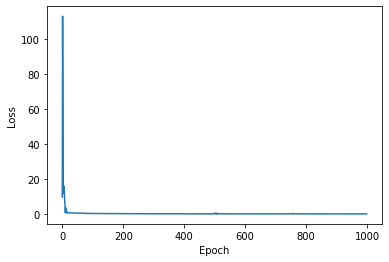

In [221]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [222]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
1
1
1
1
0
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
0
1
0
1
1
0
0
0
1
1
1
1
0
0
0
0
0
0
1
1
1
0
0
1
0
1
1
1
0
1
1
0
0
1
0
0
0
0
0
1
1
1
0
1
0
0
0
1
1
0
1
1
1
0
0
1
0
0
0
0
0
0
0
1
0
1
0
1
1
0
1
1
0


array([[63,  4],
       [ 1, 46]])

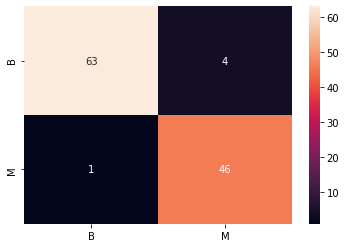

In [223]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, xticklabels=le.classes_, yticklabels=le.classes_);
cm

In [224]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score